In [1]:
 !pip install tensorflow-gpu==2.0.0rc0

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D,ZeroPadding2D,Dropout,BatchNormalization
from tensorflow.keras.optimizers import SGD

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import cv2

In [6]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset

fatal: destination path 'dog-cat-full-dataset' already exists and is not an empty directory.


In [0]:
Test_data_dir = '/content/dog-cat-full-dataset/data/test'

In [0]:
Train_data_dir = '/content/dog-cat-full-dataset/data/train'

In [0]:
img_size = (32,32)
batch_size = 20

In [0]:
datagen = ImageDataGenerator(rescale=(1.0/255.0))

In [11]:
train_gen = datagen.flow_from_directory(Train_data_dir,img_size,classes=['cats','dogs'],class_mode='binary',batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [12]:
test_gen = datagen.flow_from_directory(Test_data_dir,img_size,classes=['cats','dogs'],class_mode='binary',batch_size=batch_size)

Found 5000 images belonging to 2 classes.


<h1>Build Base CNN Model

In [0]:
model = Sequential()
model.add(Conv2D(64,(3,3),padding = 'same',kernel_initializer='he_uniform',input_shape = (img_size[0],img_size[1],3)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128,'relu',kernel_initializer='he_uniform'))
model.add(Dense(1,'sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss = 'binary_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2097280   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,099,201
Trainable params: 2,099,201
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit_generator(train_gen,len(train_gen),5,validation_data=test_gen,validation_steps=len(test_gen),verbose = 1)

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1000/1000 [==============================] - 120s 120ms/step - loss: 7.6606 - accuracy: 0.4999 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 119s 119ms/step - loss: 7.6627 - accuracy: 0.5000 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 3/5
1000/1000 [==============================] - 120s 120ms/step - loss: 7.4092 - accuracy: 0.5015 - val_loss: 0.6919 - val_accuracy: 0.4998
Epoch 4/5
1000/1000 [==============================] - 121s 121ms/step - loss: 0.6919 - accuracy: 0.5115 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 5/5
1000/1000 [==============================] - 120s 120ms/step - loss: 0.6886 - accuracy: 0.5292 - val_loss: 0.6901 - val_accuracy: 0.5258


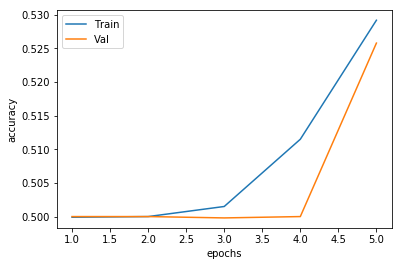

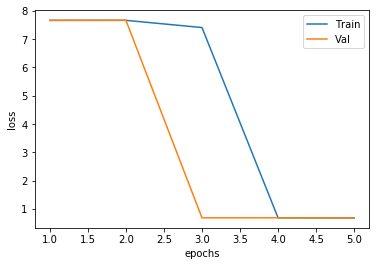

In [17]:
epoch_Range = range(1,6)
plt.plot(epoch_Range,history.history['accuracy'])
plt.plot(epoch_Range,history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()
plt.plot(epoch_Range,history.history['loss'])
plt.plot(epoch_Range,history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

In [18]:
testing = datagen.flow_from_directory("/content/folder",img_size)
model.predict_generator(testing)

Found 2 images belonging to 3 classes.


array([[0.53386587],
       [0.51866436]], dtype=float32)

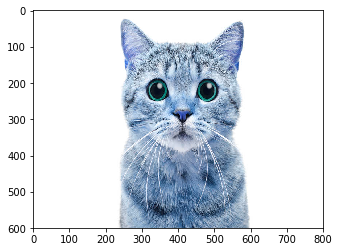

In [19]:
plt.imshow(cv2.imread('/content/folder/catto/catto.jpg'))

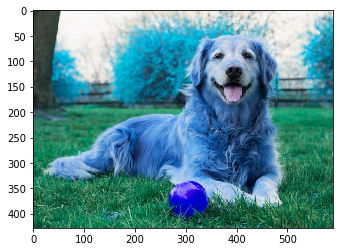

In [20]:
plt.imshow(cv2.imread('/content/folder/doggo/doggo.jpg'))

<h1>Build network with batch normalisation and dropout</h1>

In [0]:
model = Sequential()
model.add(Conv2D(64,(3,3),padding = 'same',kernel_initializer='he_uniform',input_shape = (img_size[0],img_size[1],3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,'relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1,'sigmoid'))

In [22]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=opt,loss = 'binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               2097280   
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)              

In [23]:
history = model.fit_generator(train_gen,len(train_gen),5,validation_data=test_gen,validation_steps=len(test_gen),verbose = 1)

Epoch 1/5
1000/1000 [==============================] - 160s 160ms/step - loss: 0.6527 - accuracy: 0.6411 - val_loss: 0.6139 - val_accuracy: 0.6684
Epoch 2/5
1000/1000 [==============================] - 159s 159ms/step - loss: 0.5971 - accuracy: 0.6878 - val_loss: 0.5766 - val_accuracy: 0.6952
Epoch 3/5
1000/1000 [==============================] - 160s 160ms/step - loss: 0.5634 - accuracy: 0.7090 - val_loss: 0.6457 - val_accuracy: 0.6604
Epoch 4/5
1000/1000 [==============================] - 161s 161ms/step - loss: 0.5440 - accuracy: 0.7279 - val_loss: 0.5728 - val_accuracy: 0.7056
Epoch 5/5
1000/1000 [==============================] - 161s 161ms/step - loss: 0.5112 - accuracy: 0.7468 - val_loss: 0.5423 - val_accuracy: 0.7440


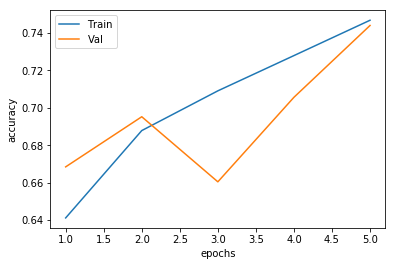

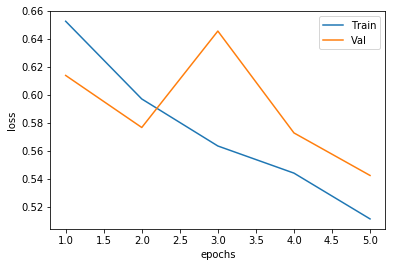

In [24]:
epoch_Range = range(1,6)
plt.plot(epoch_Range,history.history['accuracy'])
plt.plot(epoch_Range,history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train','Val'])
plt.show()
plt.plot(epoch_Range,history.history['loss'])
plt.plot(epoch_Range,history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train','Val'])
plt.show()

In [25]:
testing = datagen.flow_from_directory("/content/folder",img_size)

Found 2 images belonging to 3 classes.


In [29]:
model.predict_generator(testing)

array([[0.98160124],
       [0.7235344 ]], dtype=float32)

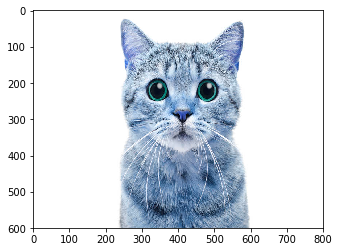

In [27]:
plt.imshow(cv2.imread('/content/folder/catto/catto.jpg'))

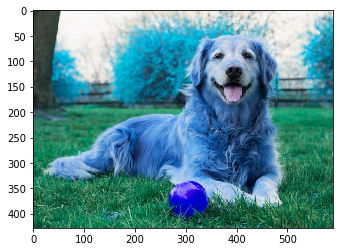

In [28]:
plt.imshow(cv2.imread('/content/folder/doggo/doggo.jpg'))